In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential  # importing sequential model for training
from keras.layers.core import Dense,Dropout,Activation, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractions
from keras.layers.convolutional import Convolution2D, MaxPooling2D # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractions
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [8]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [15]:
x_train.shape #display total data set
x_train[0].shape #only show dimension of columns data set 


(28, 28)

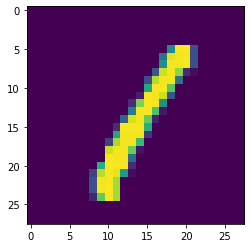

In [24]:
plt.imshow(x_train[3])

In [27]:
# lets see what the data in y-train
y_train[3]


# so in x, y train data at 3 index is 1
y_train[:4]


array([5, 0, 4, 1], dtype=uint8)

In [55]:
x_train.shape

(60000, 28, 28)

In [56]:
# lets scale these values between 0 and 1 
x_train = x_train/ 255
x_test = x_test/ 255

In [57]:
# lets reshape the data 
# x_train.reshape(len(x_train,28, 28))
# here we have the 1st dim is 60k and other 2nd is 28 so product of 28*28 is 784

# I want to store 3 dimention data to single one by reshape

x_train_flatten = x_train.reshape(len(x_train),28 * 28)
# now 2 to 1 dimention data converted (60000, 784)
x_train_flatten.shape




(60000, 784)

In [60]:
x_train_flatten[0]
# values are between 0 and 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
# Do same for x_test
x_test_flatten = x_test.reshape(len(x_test),28 * 28) #### This thing can be done by Flatten layer in hidden layer ##
# now 2 to 1 dimention data converted (60000, 784)
x_test_flatten.shape


# suitable data is 10k for testing

(10000, 784)

In [41]:
# x_test_flatten[0]

In [59]:
# lets use some sequential stack for featueres extractions

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,) ,activation = 'sigmoid' ) 
    # 10 is output vectors, inputs shape is 784 
])

model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
# sparse_categorical_crossentropy means our data is in digits not in hot encoding labels

model.fit(x_train_flatten, y_train, epochs = 5)

# evaluating accuracy on train data set

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4715 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9255


In [61]:
# Evaluate accuracy on test data set
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9264


[0.26957911252975464, 0.9264000058174133]

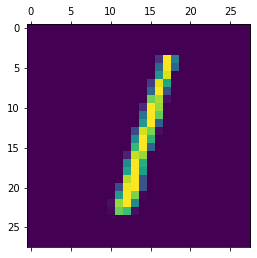

In [73]:
plt.matshow(x_test[2])

In [75]:
model.predict(x_test_flatten)
# predict all sample images

array([[3.35639715e-02, 3.27032410e-07, 6.32829964e-02, ...,
        9.99830842e-01, 1.35122001e-01, 6.86071336e-01],
       [4.27923501e-01, 2.31257081e-03, 9.98567820e-01, ...,
        5.80194421e-13, 1.72141492e-01, 3.42228912e-09],
       [4.80860472e-04, 9.92736399e-01, 6.56881630e-01, ...,
        1.23603284e-01, 4.25734818e-01, 4.77088988e-02],
       ...,
       [3.37053484e-06, 3.38942391e-06, 1.63525343e-03, ...,
        2.41896451e-01, 5.91396093e-01, 8.06283474e-01],
       [1.12012938e-04, 1.58220530e-04, 1.96278095e-04, ...,
        5.55052939e-05, 6.93922997e-01, 1.22656638e-04],
       [4.11266088e-03, 1.40232770e-10, 1.54023767e-01, ...,
        9.14140053e-09, 2.80618668e-04, 5.18426589e-07]], dtype=float32)

In [89]:
# I want to predict my first images which is 7

y_pred = model.predict(x_test_flatten)
y_pred[2]
# it predicted all 10 output vectos with possible probability



array([1.4496744e-03, 9.9938381e-01, 7.2653621e-02, 2.1315813e-03,
       4.3369234e-02, 5.7030022e-03, 4.9872488e-02, 3.5908195e-01,
       9.6918643e-02, 2.5793910e-04], dtype=float32)

In [88]:
# Lets find the max value by numpy method argmax()
np.argmax(y_pred[2])
# so it predicted correct which is 7. we can try any image like 1

1

In [79]:
y_test[0:5] # y_test contain int value
# but y_pred has whole values like 3.37053484e-06.....

array([7, 2, 1, 0, 4], dtype=uint8)

In [82]:
# lets convert it into concrete class label
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]

# so y_pred_labels are now int values [7, 2, 1, 0, 4]

[7, 2, 1, 0, 4]

In [85]:
# using tensorflow for the data converted into confusion matrix
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels) # this can't expect int value in y_test we convert it into concrete class
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    5,    4,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   5,    7,  916,   21,   10,    4,   12,   10,   44,    3],
       [   2,    0,   13,  931,    1,   20,    2,   10,   25,    6],
       [   1,    1,    4,    2,  927,    0,   10,    3,    9,   25],
       [   8,    2,    2,   36,   11,  773,   13,    8,   32,    7],
       [  11,    3,    5,    1,    8,   13,  913,    2,    2,    0],
       [   1,    5,   20,    8,    9,    0,    0,  948,    3,   34],
       [   5,    5,    7,   18,    9,   22,    8,   12,  883,    5],
       [  10,    7,    1,   10,   40,    6,    0,   23,    9,  903]])>

Text(69.0, 0.5, 'Truth values')

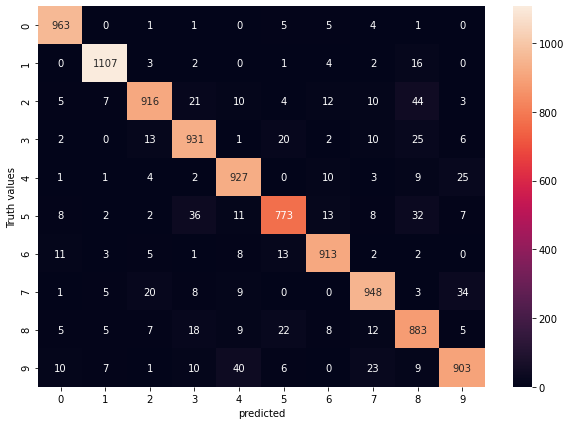

In [86]:
# lets display it in some apealing way
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot = True, fmt= "d")
plt.xlabel('predicted')
plt.ylabel('Truth values')

In [87]:
# Lets do some featurs extractions by adding hidden layers
# lets use sequential stack for featueres extractions

model = keras.Sequential([
    keras.layers.Dense(100, ,input_shape = (784), activation = 'relu' ) ,
# 100 is no of neuron you specify in hidden layers must less than input shape
    keras.layers.Dense(10, activation = 'sigmoid' ) 
    
    # 10 is output vectors, inputs shape is 784 
])

model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
# sparse_categorical_crossentropy means our data is in digits not in hot encoding labels

model.fit(x_train_flatten, y_train, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2817 - accuracy: 0.9195
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1299 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0904 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0704 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0559 - accuracy: 0.9829


In [ ]:
model.evaluate(x_test_flatten, y_test) 
# evaluate accuracy  0.974 on test data which was 92 without hidden layer

In [101]:

# **********  Using Flatten layer to flatten train, test data ***
# Lets do some featurs extractions by adding hidden layers
# lets use sequential stack for featueres extractions

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (784,)), 
    keras.layers.Dense(100, activation = 'tanh' ),
    keras.layers.Dense(10, activation = 'sigmoid' ) 
    
# 100 is no of neuron you specify in hidden layers must less than input
# 10 is output vectors, inputs shape is 784 
])

model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
# sparse_categorical_crossentropy means our data is in digits not in hot encoding labels

model.fit(x_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2926 - accuracy: 0.9173
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1444 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1016 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9830


In [102]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9729


[0.08676072210073471, 0.9728999733924866]

Text(69.0, 0.5, 'Truth values')

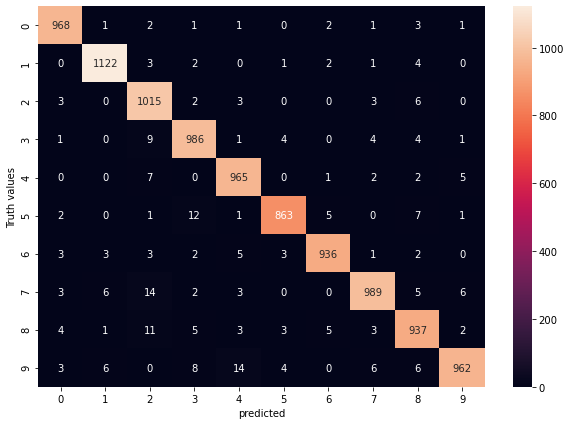

In [103]:
# Heat map
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels) # this can't expect int value in y_test we convert it into concrete class
conf_matrix


import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot = True, fmt= "d")
plt.xlabel('predicted')
plt.ylabel('Truth values')
